In [2]:
# CS 451/551
# Coding Practice Session 6
# Last name: Guthrie
# Email: mbguthrie1@crimson.ua.edu
# Q1
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

iris = load_iris()

X = iris.data
y = iris.target
features = iris.feature_names
targets = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Test Accuracy: 0.9777777777777777


Test Accuracy: 1.0
Feature Importances: [0.         0.         0.92510833 0.07489167]


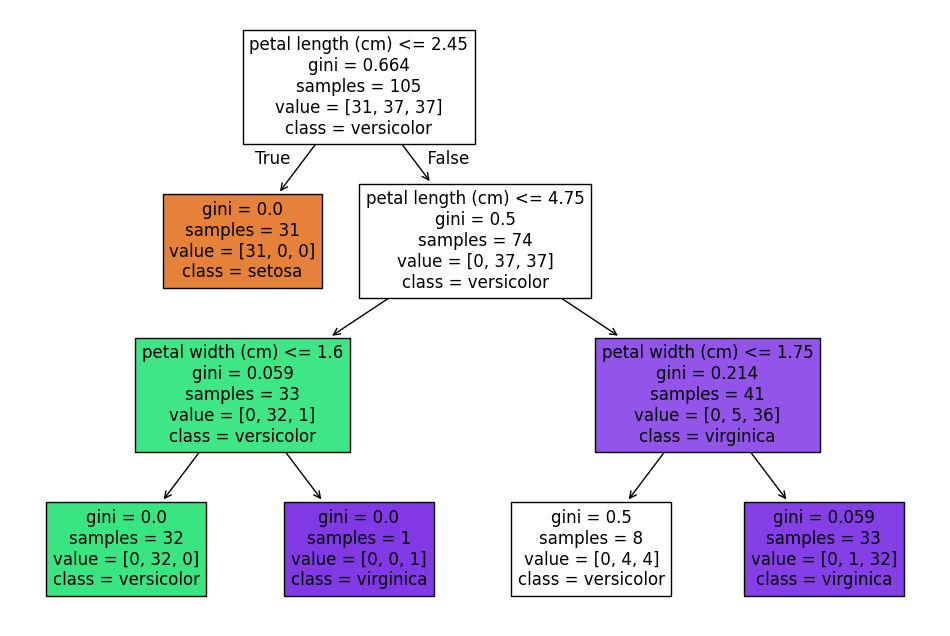

In [3]:
# Q2
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Feature Importances:", model.feature_importances_)

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

n_estimators=10, Accuracy=1.0000
n_estimators=50, Accuracy=1.0000
n_estimators=100, Accuracy=1.0000


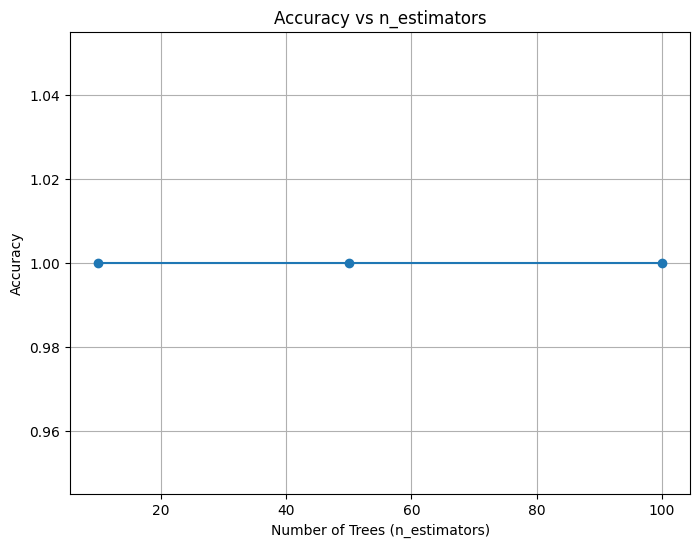


Best Model n_estimators=10
Feature Importances: [0.13437716 0.03558977 0.42041692 0.40961614]


In [4]:
# Q3
from sklearn.ensemble import RandomForestClassifier

n_estimators_list = [10, 50, 100]
accuracies = []

for n in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"n_estimators={n}, Accuracy={acc:.4f}")
    
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_list, accuracies, marker='o')
plt.title("Accuracy vs n_estimators")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Best model (based on accuracy)
best_n = n_estimators_list[accuracies.index(max(accuracies))]
best_model = RandomForestClassifier(n_estimators=best_n, random_state=42)
best_model.fit(X_train, y_train)

# Feature importance
print(f"\nBest Model n_estimators={best_n}")
print("Feature Importances:", best_model.feature_importances_)

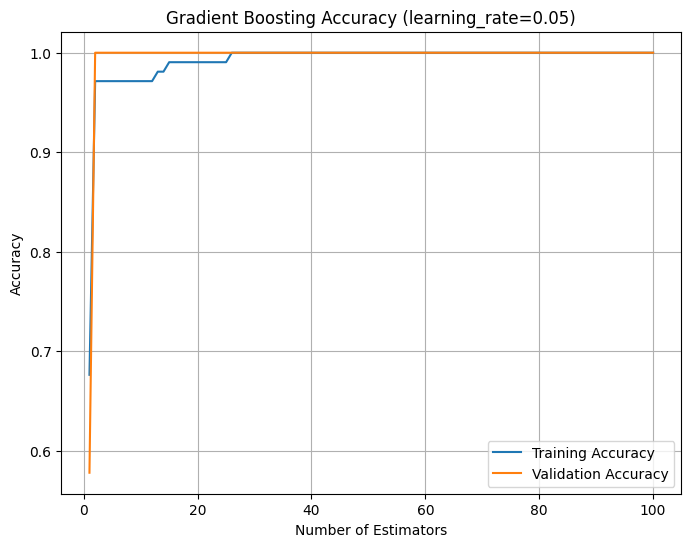

Final Training Accuracy: 1.0
Final Validation Accuracy: 1.0


In [6]:
# Q4
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

train_scores = []
test_scores = []

for train_pred, test_pred in zip(model.staged_predict(X_train), model.staged_predict(X_test)):
    pass

for train_pred, test_pred in zip(model.staged_predict(X_train), model.staged_predict(X_test)):
    train_scores.append((train_pred == y_train).mean())
    test_scores.append((test_pred == y_test).mean())
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_scores) + 1), train_scores, label='Training Accuracy')
plt.plot(range(1, len(test_scores) + 1), test_scores, label='Validation Accuracy')
plt.title("Gradient Boosting Accuracy (learning_rate=0.05)")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

print("Final Training Accuracy:", model.score(X_train, y_train))
print("Final Validation Accuracy:", model.score(X_test, y_test))

C=0.1, Test Accuracy=1.0000
C=1.0, Test Accuracy=1.0000
C=10.0, Test Accuracy=1.0000


<Figure size 800x600 with 0 Axes>

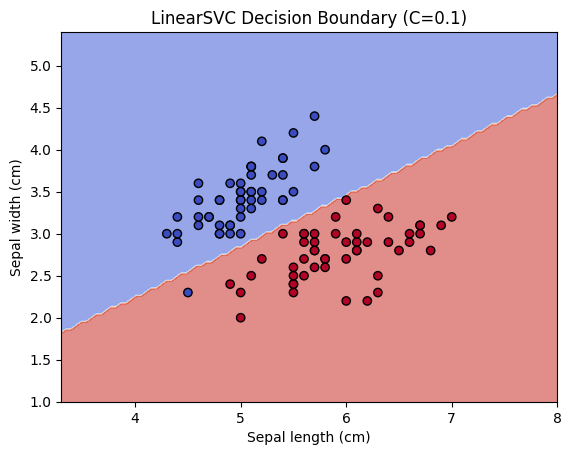

In [8]:
# Q5
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

X = iris.data[iris.target < 2, :2]
y = iris.target[iris.target < 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C_values = [0.1, 1.0, 10.0]
accuracies = []

for C in C_values:
    model = LinearSVC(C=C, random_state=42, max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"C={C}, Test Accuracy={acc:.4f}")
    
best_C = C_values[np.argmax(accuracies)]
best_model = LinearSVC(C=best_C, random_state=42, max_iter=10000)
best_model.fit(X_train, y_train)

plt.figure(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    best_model,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.6,
    xlabel="Sepal length (cm)",
    ylabel="Sepal width (cm)"
)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
plt.title(f"LinearSVC Decision Boundary (C={best_C})")
plt.show()

Gamma=0.1, C=0.1, Accuracy=1.0000
Gamma=0.1, C=1.0, Accuracy=1.0000
Gamma=0.1, C=10.0, Accuracy=1.0000
Gamma=1.0, C=0.1, Accuracy=1.0000
Gamma=1.0, C=1.0, Accuracy=1.0000
Gamma=1.0, C=10.0, Accuracy=1.0000
Gamma=10.0, C=0.1, Accuracy=0.4889
Gamma=10.0, C=1.0, Accuracy=0.9778
Gamma=10.0, C=10.0, Accuracy=0.9778


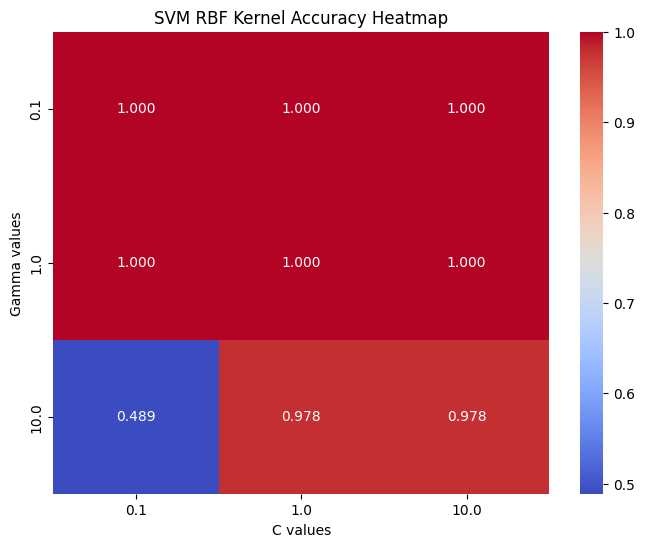

In [9]:
# Q6
from sklearn.svm import SVC
import seaborn as sns

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C_values = [0.1, 1.0, 10.0]
gamma_values = [0.1, 1.0, 10.0]
accuracy_matrix = np.zeros((len(gamma_values), len(C_values)))

for i, gamma in enumerate(gamma_values):
    for j, C in enumerate(C_values):
        model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracy_matrix[i, j] = acc
        print(f"Gamma={gamma}, C={C}, Accuracy={acc:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(
    accuracy_matrix,
    annot=True,
    xticklabels=C_values,
    yticklabels=gamma_values,
    cmap="coolwarm",
    fmt=".3f"
)
plt.title("SVM RBF Kernel Accuracy Heatmap")
plt.xlabel("C values")
plt.ylabel("Gamma values")
plt.show()

In [10]:
# Q7
import torch.nn as nn

class TinyModel(nn.Module):
    def __init__(self):
        super(TinyModel, self).__init__()
        self.linear1 = nn.Linear(100, 200)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(200, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x
    
model = TinyModel()

print("Model Architecture:\n", model)

print("\nLayer 1 (Linear 100→200):", model.linear1)
print("Layer 2 (Linear 200→10):", model.linear2)
print("Activation (ReLU):", model.relu)
print("Output (Softmax):", model.softmax)

print("\nAll Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.shape}")

print("\nLinear2 Layer Parameters:")
for param in model.linear2.parameters():
    print(param)

Model Architecture:
 TinyModel(
  (linear1): Linear(in_features=100, out_features=200, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Layer 1 (Linear 100→200): Linear(in_features=100, out_features=200, bias=True)
Layer 2 (Linear 200→10): Linear(in_features=200, out_features=10, bias=True)
Activation (ReLU): ReLU()
Output (Softmax): Softmax(dim=1)

All Model Parameters:
linear1.weight: torch.Size([200, 100])
linear1.bias: torch.Size([200])
linear2.weight: torch.Size([10, 200])
linear2.bias: torch.Size([10])

Linear2 Layer Parameters:
Parameter containing:
tensor([[ 0.0242, -0.0441, -0.0030,  ...,  0.0320, -0.0133, -0.0226],
        [ 0.0095,  0.0574,  0.0088,  ..., -0.0594,  0.0440, -0.0395],
        [-0.0031,  0.0529,  0.0119,  ..., -0.0280,  0.0112, -0.0607],
        ...,
        [-0.0523, -0.0434, -0.0214,  ..., -0.0513,  0.0238, -0.0025],
        [-0.0004,  0.0324,  0.0119,  ..., -0.0470, -0.0613,  0.0111],

In [15]:
# Q8
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

training_set = torchvision.datasets.FashionMNIST(
    './data',
    train=True,
    download=True,
    transform=transform
)

validation_set = torchvision.datasets.FashionMNIST(
    './data',
    train=False,
    download=True,
    transform=transform
)

train_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True)
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False)

classes = (
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'
)

print("Number of training samples:", len(training_set))
print("Number of validation samples:", len(validation_set))
print("Class Labels:", classes)

writer = SummaryWriter()

Number of training samples: 60000
Number of validation samples: 10000
Class Labels: ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
